In [2]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import gc
import pickle
import statistics as st
#from venn import venn
import seaborn as sns
import itertools as it

In [3]:
networks={}
networks['HINT'] = nx.read_edgelist('2 - output/HINT.edgelist',delimiter='\t')
networks['IntAct'] = nx.read_edgelist('2 - output/IntAct.edgelist',delimiter='\t')
networks['Reactome'] = nx.read_edgelist('2 - output/Reactome.edgelist',delimiter='\t')
networks['STRING'] = nx.read_edgelist('2 - output/STRING.edgelist',delimiter='\t')

In [4]:
networks['STRING'].has_node('FAS')

True

In [5]:
for n,G in networks.items():
    print(n,round(nx.density(G),4))

HINT 0.0011
IntAct 0.001
Reactome 0.0032
STRING 0.0018


In [4]:
edges=networks['STRING'].number_of_edges()
nodes=networks['STRING'].number_of_nodes()
(edges*2) / (nodes*(nodes-1))

0.0018389128733437548

## Scale Free Characterization

Eu acho que vale a pena dar uma boa referenciada em como a literatura se preocupa muito com a distribuição de grau e o papel dos hubs. Usam Scale Free como uma caracterização global, oq é verdade, mas sozinha pode enganar. Não da pra dizer que duas redes são 'iguais' só pq tem um comportamento scale-free parecido. 

In [21]:
# Python Lib POWER LAW: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777 
import powerlaw
def scaleFreeMeasures(G):    
    degree=sorted(dict(G.degree()).values(),reverse=True)
    
    #Fitting with powerlaw lib #We let the lib choose the xmin
    fit = powerlaw.Fit(degree,verbose=False)
    # Comparing the distribution with a power law, and a exponential # R is the Ratio and p is the p-value
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)    
    
    #General information
    info={}
    #info['N']=len(G.nodes) # Number of Nodes
    #info['L']=len(G.edges) # Number of Edges
    
    info['Mean']= round(st.mean(degree),2) #Average degree
    info['Median']= st.median(degree) #Median degree
    #info['']= round(st.variance(degree) + st.mean(degree)**2,2) #The 2 moment of the degree
    info['Max']= max(degree) #Biggest hub
    
    kmin=fit.power_law.xmin #Nodes with degree < than kmin are discarded from the distribution in order the find the gamma
    gamma=fit.power_law.alpha # Degree Exponent (after xmin)  
#     info['kMinCut'] = kmin    
#     info['PowerLawRatio'] = round(R,3)
#     info['pValue'] = round(p,4)
    info['γ'] = round(gamma,1)
    return info       
    
def scaleFreePlot(G,plotOrder,name=''): 
    degree=sorted(dict(G.degree()).values(),reverse=True)
    fit = powerlaw.Fit(degree,verbose=False)
    
    #Call the function to get the measures    
    info = scaleFreeMeasures(G)
    #resume = str(info).replace('{','').replace('}','').replace('\'','').replace(',',' |')
    
    #plt.figure(figsize=(9,9),dpi=250)
    plt.title(name+' - Mean: '+str(info['Mean'])+'\n Median: '+str(info['Median'])+' | Max: '+str(info['Max'])+' | γ: '+str(info['γ']), fontsize=16)    
    ####-------------------PowerLaw Lib
    
#     fit.plot_pdf(color='r', linewidth=2)
#     fit.power_law.plot_pdf(color='g', linestyle='--')   
    
    #Frequence of each value
    freq={}
    length = len(degree)
    for v in degree:
        if(v in freq):
            freq[v]+=1
        else:
            freq[v]=1            
    #Probability of a 'd' value happens
    pk={}        
    for f in freq:
        pk[f]=freq[f]/length 
    x=list(pk.keys())
    y=list(pk.values())    
    
    ####-------------------Probability LogLog
    
    plt.loglog(x,y,'.')
    plt.xlabel('K',fontsize=14)    
    if plotOrder == 0:
        plt.ylabel(r'$p_k$',rotation = 0,fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    #plt.show()

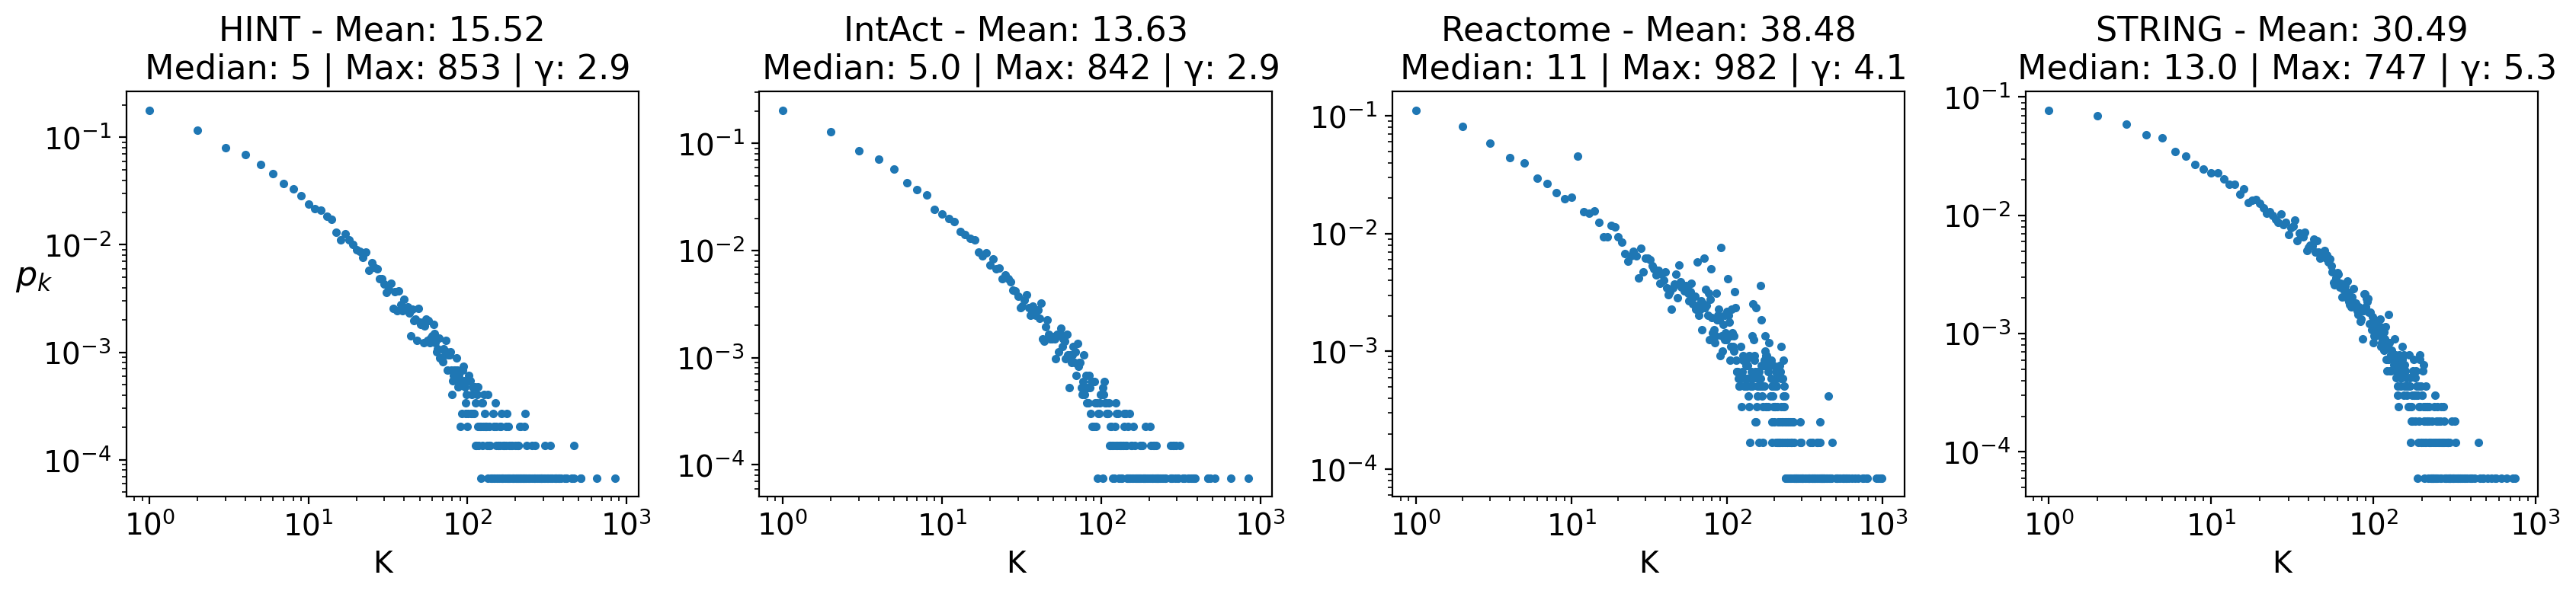

In [22]:
plt.figure(figsize=(17,4),dpi=200)

for i,name in enumerate(networks):
    plt.subplot(1,4,i+1)
    scaleFreePlot(networks[name],i,name)    

#plt.suptitle('Scale Free Characterization',fontsize=24)
plt.tight_layout()
plt.savefig("2.1 - output/Scale Free Characterization.png", format='png', dpi=550,facecolor='white')
plt.savefig("2.1 - output/Scale Free Characterization.pdf", format='pdf')
plt.show()

## Communities

In [5]:
file = open('2 - output/communities.pickle', 'rb')
data = pickle.load(file)
file.close()

In [8]:
ccs = sorted([len(cc) for cc in data['HINT']],reverse=True)
ccs

[5344,
 3784,
 1885,
 1065,
 510,
 371,
 248,
 186,
 179,
 159,
 125,
 88,
 42,
 29,
 28,
 16,
 12,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


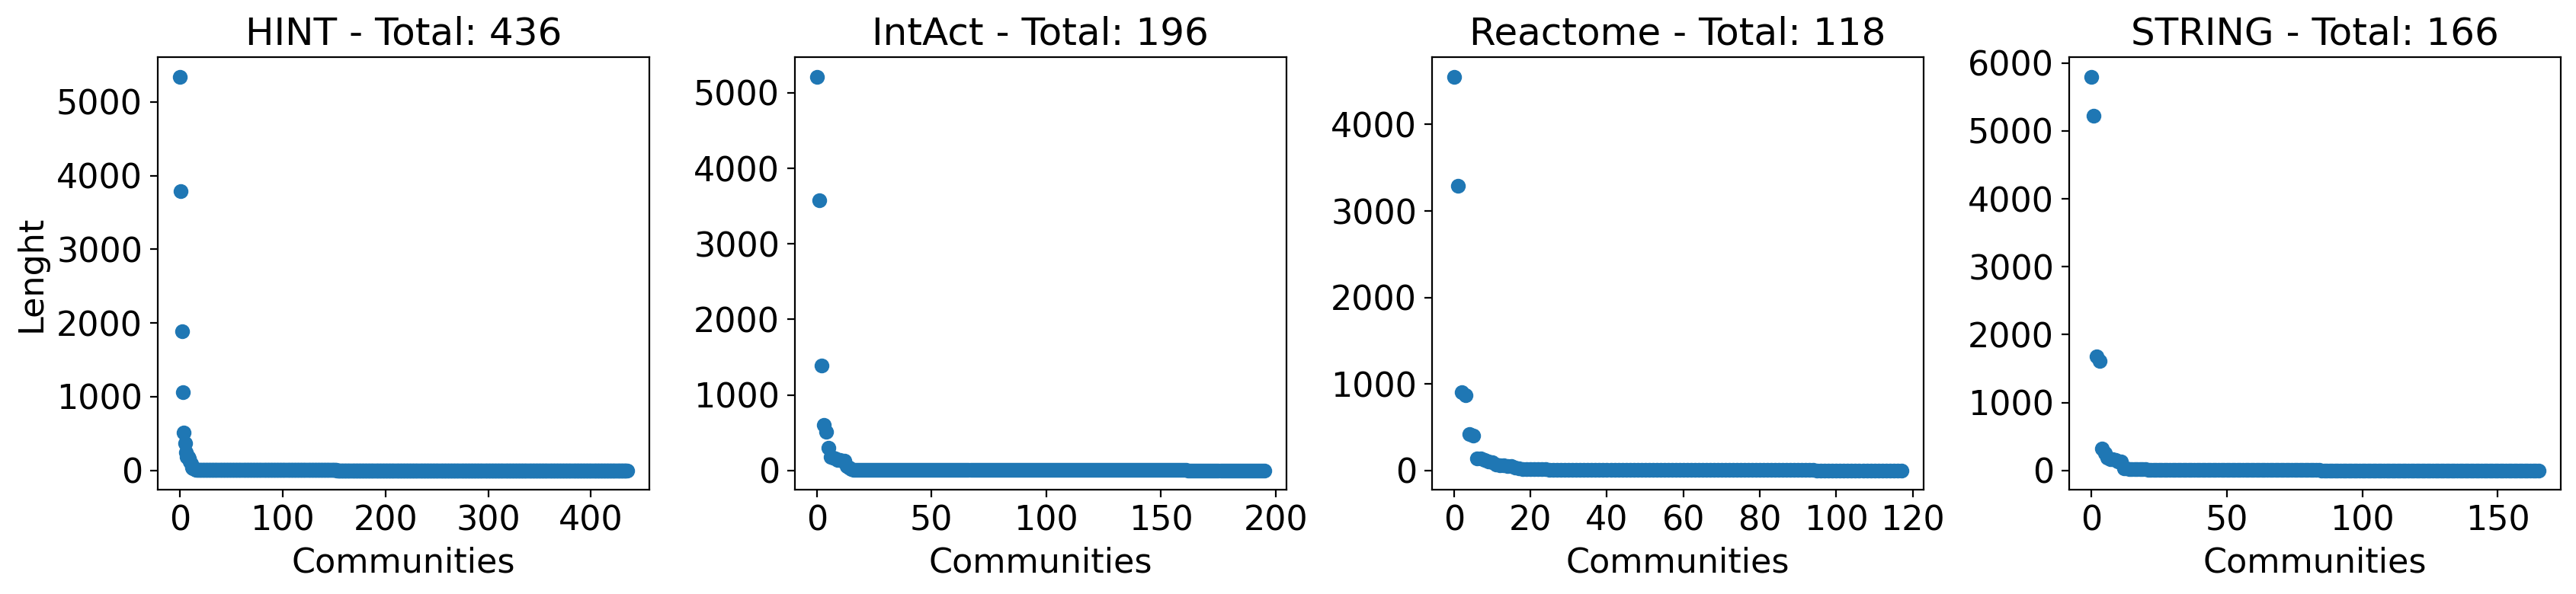

In [17]:
plt.figure(figsize=(17,4),dpi=200)

for i,name in enumerate(networks):
    plt.subplot(1,4,i+1)
        
    total=len(data[name])
    ccs = sorted([len(cc) for cc in data[name]],reverse=True)

    plt.plot(ccs,'o')
    plt.xlabel("Communities",fontsize=16)
    if i == 0:
        plt.ylabel("Lenght",fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.title(name+' - Total: '+str(total),fontsize=18)
    plt.tight_layout()
#plt.suptitle('Communities Characterization',fontsize=24)
plt.tight_layout()
plt.savefig("2.1 - output/Communities.png", format='png', dpi=550,facecolor='white')
plt.savefig("2.1 - output/Communities.pdf", format='pdf')
plt.show()


# Assortativity

In [19]:
file = open('2 - output/assortativity.pickle', 'rb')
data = pickle.load(file)
file.close()

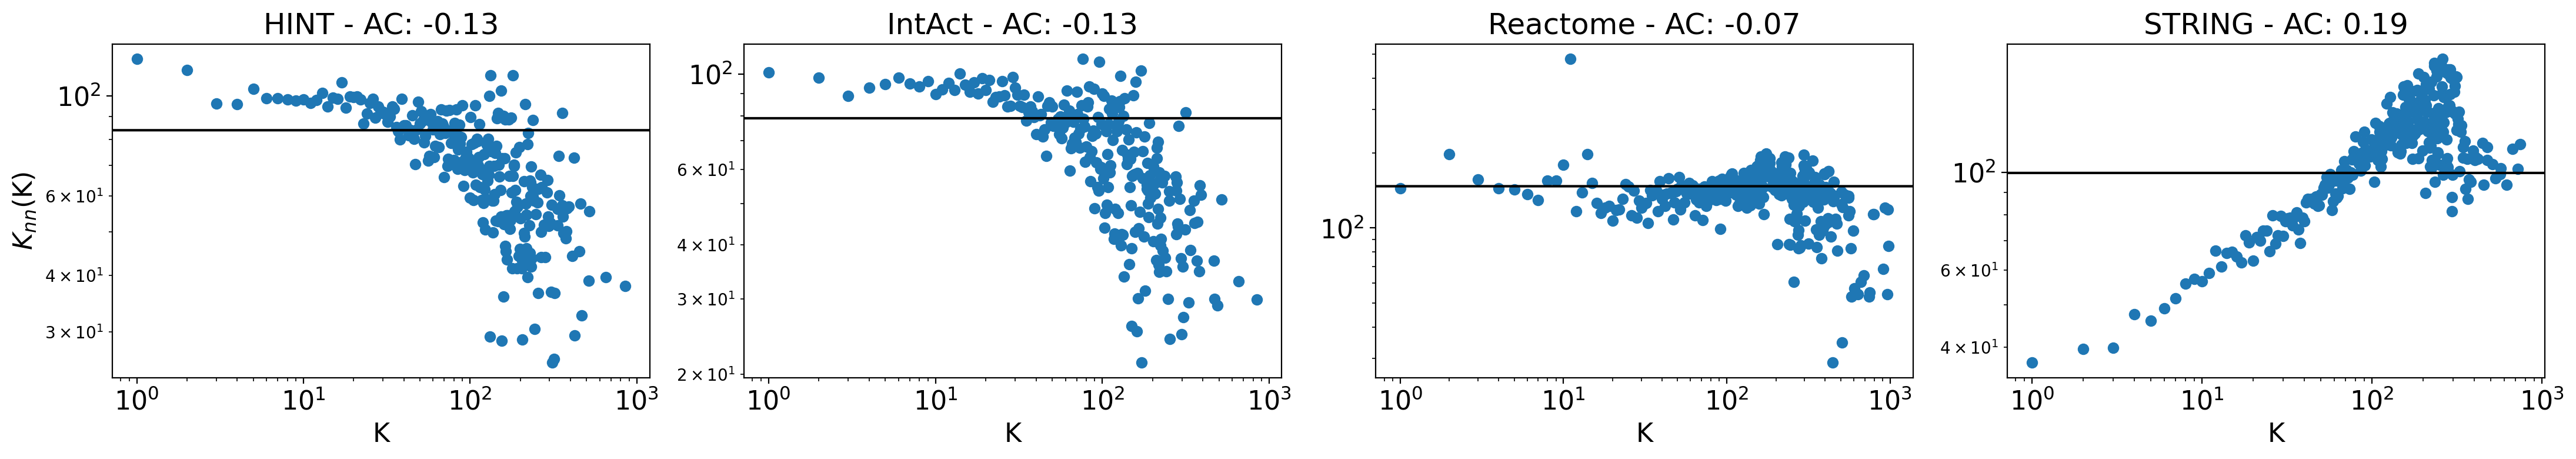

In [21]:
plt.figure(figsize=(22,4),dpi=200)

for i,name in enumerate(networks):
    plt.subplot(1,4,i+1)

    G = networks[name]
    
    #Plot the distribution
    plt.loglog(list(data[name]['distribution'].keys()),list(data[name]['distribution'].values()),'o',subs=[50,100,150])

     #Plot the line for a random prediction
    degree = list(dict(G.degree).values())
    neutralNetwork=round((st.variance(degree) + st.mean(degree)**2)/st.mean(degree),2)
    ylim=plt.gca().get_ylim()
    xlim=plt.gca().get_xlim()
    randomPrediction=[neutralNetwork for x in range(int(xlim[1]*1.1))]    
    
    plt.loglog(range(int(xlim[1]*1.1)),randomPrediction,'-',color='black')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('K',fontsize=16)
    if i == 0:
        plt.ylabel(r'$K_n$'r'$_n$(K)',rotation = 90,fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    assortativityCoeff = round(data[name]['coefficient'],2)
    if(np.isnan(assortativityCoeff)):
        assortativityCoeff='Null'
        
    #plt.title(name+'\n'+'Assortativity Coefficient: '+str(assortativityCoeff),fontsize=18)
    plt.title(name+' - '+'AC: '+str(assortativityCoeff),fontsize=18)
    plt.tight_layout()
    
plt.savefig("2.1 - output/Assortatividade.png", format='png', dpi=550,facecolor='white')
plt.savefig("2.1 - output/Assortatividade.pdf", format='pdf')
plt.show()

# Small World

In [23]:
file = open('2 - output/smallWorld.pickle', 'rb')
data = pickle.load(file)
file.close()

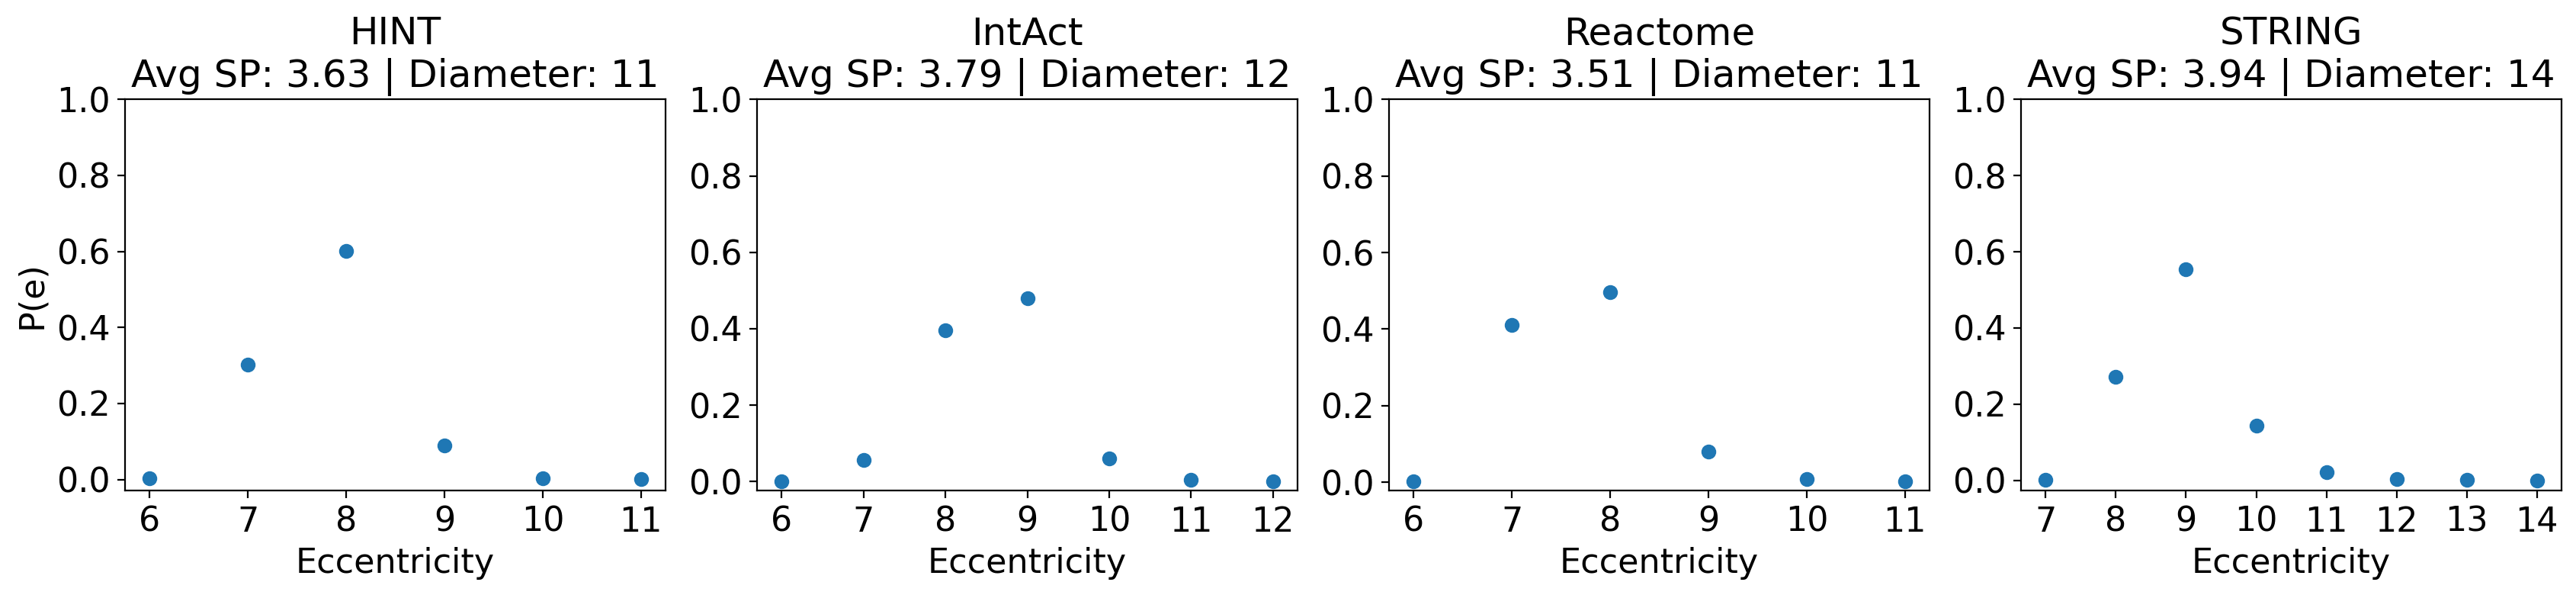

In [24]:
plt.figure(figsize=(17,4),dpi=200)

for i,name in enumerate(networks):
    plt.subplot(1,4,i+1)
        
    avgSP = data[name]['avgSP']
    diameter = data[name]['diameter']
    eccentricityProb = data[name]['ecc']

    plt.plot(list(eccentricityProb.keys()),list(eccentricityProb.values()),'o')
    plt.yticks(np.arange(0,1.1,0.2))
    plt.xlabel("Eccentricity",fontsize=16)
    if i==0:
        plt.ylabel("P(e)",fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.title(name+'\nAvg SP: '+str(avgSP)+' | Diameter: '+str(diameter),fontsize=18)
    plt.tight_layout()
#plt.suptitle('Small World Characterization',fontsize=24)
plt.tight_layout()
plt.savefig("2.1 - output/SmallWorld.png", format='png', dpi=550,facecolor='white')
plt.savefig("2.1 - output/SmallWorld.pdf", format='pdf')
plt.show()

# Attack and Resilience

In [6]:
file = open('2 - output/attackResilience.pickle', 'rb')
matrizOfImpacts = pickle.load(file)
file.close()

In [7]:
def whenEdgesEnds(name,y,xAxis):
    for lccSize, fracao in zip(y,xAxis):
        if(lccSize==0):
            print(name,lccSize,fracao)
            return

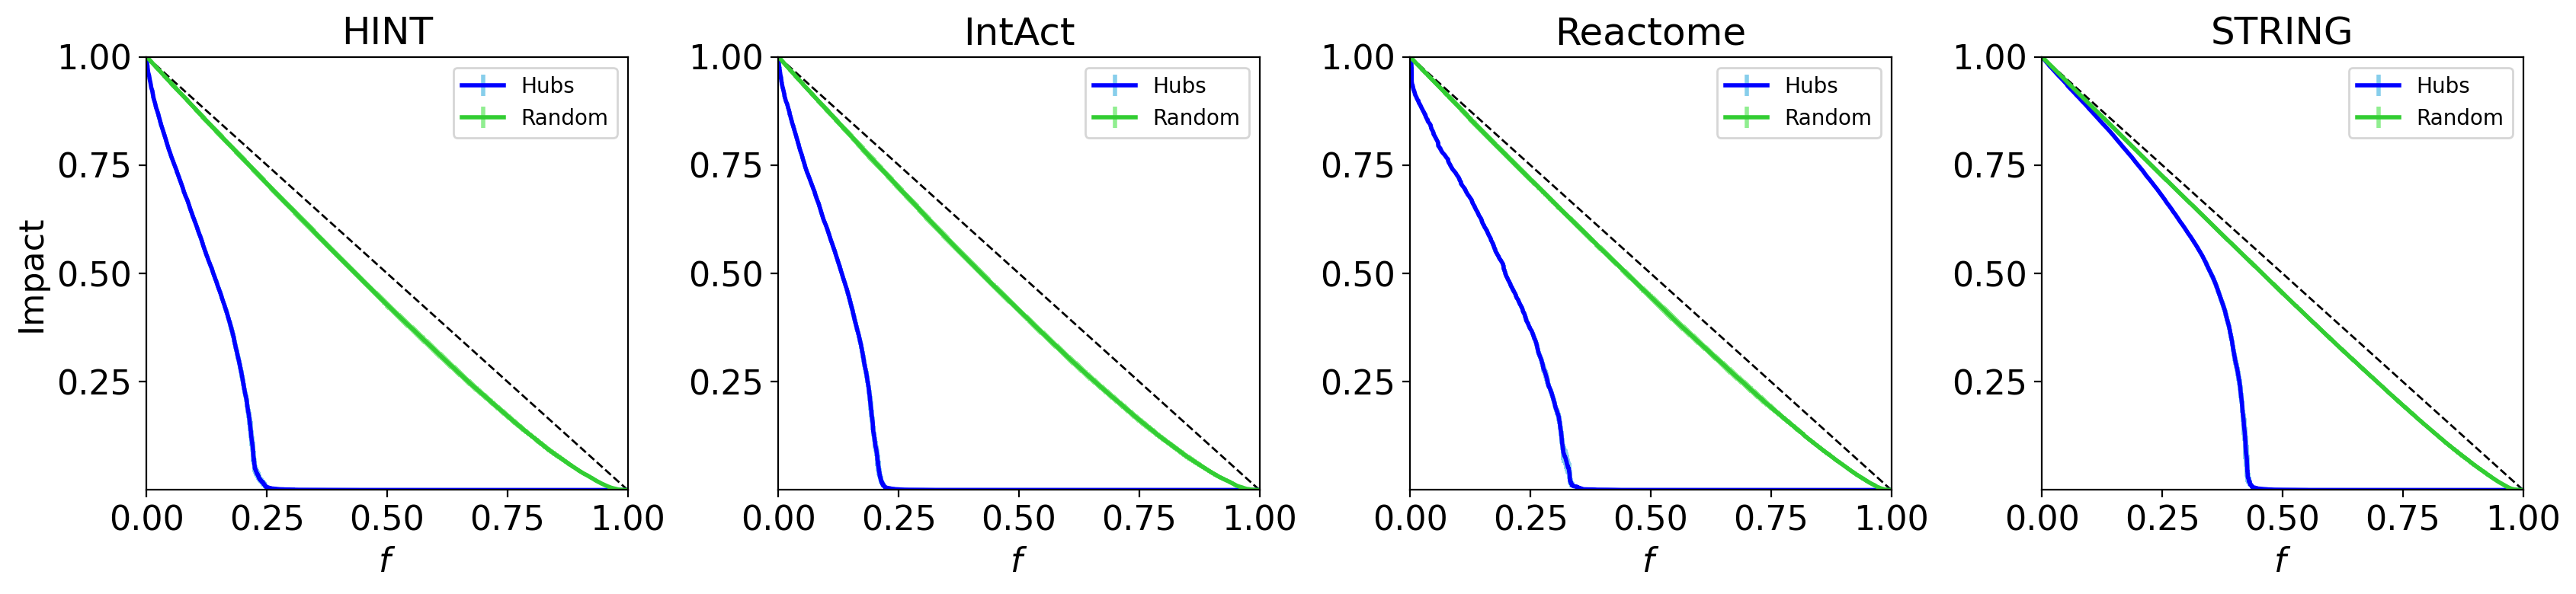

In [9]:
plt.figure(figsize=(17,4),dpi=200)

for i,name in enumerate(['HINT', 'IntAct', 'Reactome', 'STRING']):
    plt.subplot(1,4,i+1)
    
    matrizOfResults,error,xAxis,y=matrizOfImpacts[name]['Hubs']
    plt.errorbar(xAxis,y,label='Hubs', yerr=error, ecolor='skyblue', elinewidth=2, capsize=0,fmt='-',color='blue',linewidth=2)
    #whenEdgesEnds(name,y,xAxis)
    
    matrizOfResults,error,xAxis,y=matrizOfImpacts[name]['Random']
    plt.errorbar(xAxis,y,label='Random', yerr=error, ecolor='lightgreen', elinewidth=2, capsize=0,fmt='-',color='limegreen',linewidth=2)
    #whenEdgesEnds(name,y,xAxis)
    
    plt.plot([0,1], [1,0], 'k--',linewidth=1)
    plt.margins(x=0)
    plt.margins(y=0)
    plt.yticks([0.25,0.5,0.75,1],fontsize=16)
    plt.xticks([0, 0.25,0.5,0.75,1],fontsize=16)
    if i==0:
        #plt.ylabel(r'$P_{\infty}(f)\,/\, P_{\infty}(0)$',size=16)
        plt.ylabel("Impact",size=16)
    plt.xlabel(r'$f$',size=16)
    plt.title(name,fontsize=18)
    plt.legend()
    plt.tight_layout()

plt.tight_layout() 

plt.savefig("2.1 - output/Attack.png", format='png', dpi=550,facecolor='white')
#plt.savefig("ouput/2 Attack.svg", format='svg')
plt.savefig("2.1 - output/Attack.pdf", format='pdf')
plt.show()

In [31]:
25,25, 35, 45

(6.0306356289952946e-05, 0.99993969364371)